In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def moving_average(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n

In [69]:
def plotting(
    data1,
    data2,
    save_path, 
    ylim1=None, 
    ylim2=None, 
    xv1=None, 
    xv2=None,
    ymax=0.9,
    title=None,
    curve_width=1,
    verticle_width=0.5
):
    # Create some mock data
    t = range(1, len(data1)+1)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Days')
    ax1.set_ylabel('cases', color=color)
    l1 = ax1.plot(t, data1, color=color, label="cases", linewidth=curve_width)
    ax1.tick_params(axis='y', labelcolor=color)
    if ylim1 is not None:
        ax1.set_ylim(ylim1)
    if xv1 is not None:
        for x in xv1:
            ax1.axvline(x=x, ymax=ymax, linestyle="--", color=color, linewidth=verticle_width)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('deaths', color=color)  # we already handled the x-label with ax1
    l2 = ax2.plot(t, data2, color=color, label="deaths", linewidth=curve_width)
    ax2.tick_params(axis='y', labelcolor=color)
    if ylim2 is not None:
        ax2.set_ylim(ylim2)
    if xv2 is not None:
        for x in xv2:
            ax2.axvline(x=x, ymax=ymax, linestyle="--", color=color, linewidth=verticle_width)

    lns = l1+l2
    labels = [l.get_label() for l in lns]
    ax1.legend(lns, labels, loc=0)

    if title is not None:
        ax1.set_title(title)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig(save_path, dpi=300)
    plt.show()

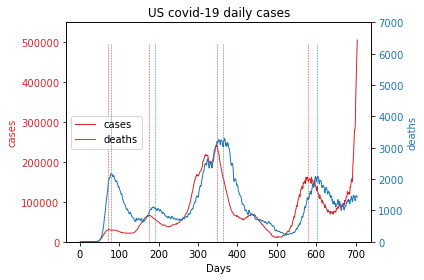

In [65]:
moving_index=15
us_covid = pd.read_csv("rolling-averages/us.csv")
data1 = moving_average(us_covid["cases"].to_numpy(), moving_index)
data2 = moving_average(us_covid["deaths"].to_numpy(), moving_index)
plotting(
    data1,
    data2,
    save_path="us_cases_deaths_20220106.png", 
    ylim1=[0, 0.55e6], 
    ylim2=[0, 7000], 
    xv1=[71, 175, 347, 580], 
    xv2=[80, 190, 363, 602], 
    title="US covid-19 daily cases"
)

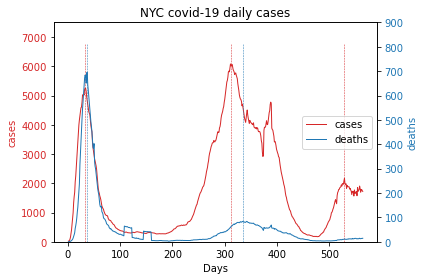

In [66]:
moving_index=15
us_covid = pd.read_csv("rolling-averages/us-counties.csv")
data1 = moving_average(us_covid.loc[us_covid["county"]=="New York City"]["cases"].to_numpy(), moving_index)
data2 = moving_average(us_covid.loc[us_covid["county"]=="New York City"]["deaths"].to_numpy(), moving_index)
plotting(
    data1,
    data2,
    save_path="nyc_cases_deaths_20220106.png", 
    ylim1=[0, 7500], 
    ylim2=[0, 900], 
    xv1=[32, 312, 528], 
    xv2=[37, 335], 
    title="NYC covid-19 daily cases"
)

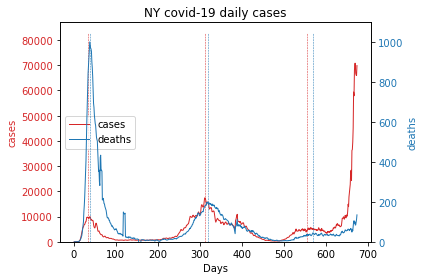

In [68]:
moving_index=5
us_covid = pd.read_csv("rolling-averages/us-states.csv")
data1 = moving_average(us_covid.loc[us_covid["state"]=="New York"]["cases"].to_numpy(), moving_index)
data2 = moving_average(us_covid.loc[us_covid["state"]=="New York"]["deaths"].to_numpy(), moving_index)
plotting(
    data1,
    data2,
    save_path="NY_cases_deaths_20220106.png", 
    ylim1=[0, 87000], 
    ylim2=[0, 1100], 
    xv1=[34, 312, 555], 
    xv2=[39, 320, 570], 
    title="NY covid-19 daily cases",
    ymax=0.95
)